In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs 

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

618

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key


In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9077f397cb8a1391689922c8104c8fff


In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [10]:
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + "i"

In [11]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.

Processing Record 1 of Set 13 | boyolangu
Processing Record 2 of Set 13 | lebu
Processing Record 3 of Set 13 | qaanaaq
Processing Record 4 of Set 13 | rikitea
Processing Record 5 of Set 13 | hilo
Processing Record 6 of Set 13 | silchar
Processing Record 7 of Set 13 | babu
Processing Record 8 of Set 13 | butaritari
Processing Record 9 of Set 13 | omaha
Processing Record 10 of Set 13 | puerto ayora
Processing Record 11 of Set 13 | yei
Processing Record 12 of Set 13 | taree
Processing Record 13 of Set 13 | tabiauea
Processing Record 14 of Set 13 | saint-philippe
Processing Record 15 of Set 13 | cabo san lucas
Processing Record 16 of Set 13 | torbay
Processing Record 17 of Set 13 | illoqqortoormiut
Processing Record 18 of Set 13 | balkhash
Processing Record 19 of Set 13 | port alfred
Processing Record 20 of Set 13 | puri
Processing Record 21 of Set 13 | ushuaia
Processing Record 22 of Set 13 | atuona
Processing Record 23 of Set 13 | kapaa
Processing Record 24 of Set 13 | busselton
Processi

In [12]:
try:
    # Parse the JSON and retrieve data.
    city_weather = requests.get(city_url).json()
    # Parse out the needed data.
    city_lat = city_weather["coord"]["lat"]
    city_lng = city_weather["coord"]["lon"]
    city_max_temp = city_weather["main"]["temp_max"]
    city_humidity = city_weather["main"]["humidity"]
    city_clouds = city_weather["clouds"]["all"]
    city_wind = city_weather["wind"]["speed"]
    city_country = city_weather["sys"]["country"]
    # Convert the date to ISO standard.
    city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
    # Append the city information into city_data list.
    city_data.append({"City": city.title(),
                      "Lat": city_lat,
                      "Lng": city_lng,
                      "Max Temp": city_max_temp,
                      "Humidity": city_humidity,
                      "Cloudiness": city_clouds,
                      "Wind Speed": city_wind,
                      "Country": city_country,
                      "Date": city_date})

# If an error is experienced, skip the city.
except:
    print("City not found. Skipping...")
    pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

-----------------------------
Data Retrieval Complete      
-----------------------------


In [13]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + "i"

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 13 | boyolangu
Processing Record 2 of Set 13 | lebu
Processing Record 3 of Set 13 | qaanaaq
Processing Record 4 of Set 13 | rikitea
Processing Record 5 of Set 13 | hilo
Processing Record 6 of Set 13 | silchar
Processing Record 7 of Set 13 | babu
Processing Record 8 of Set 13 | butaritari
Processing Record 9 of Set 13 | omaha
Processing Record 10 of Set 13 | puerto ayora
Processing Record 11 of Set 13 | yei
Processing Record 12 of Set 13 | taree
Processing Record 13 of Set 13 | tabiauea
City not found. Skipping...
Processing Record 14 of Set 13 | saint-philippe
Processing Record 15 of Set 13 | cabo san lucas
Processing Record 16 of Set 13 | torbay
Processing Record 17 of Set 13 | illoqqortoormiut
City not found. Skipping...
Processing Record 18 of Set 13 | balkhash
Processing Record 19 of Set 13 | port alfred
Processing Record 20 of Set 13 | puri
Processing Record 21 of Set 13 | ushuaia
Processing Rec

Processing Record 32 of Set 16 | hualmay
Processing Record 33 of Set 16 | russell
Processing Record 34 of Set 16 | lampang
Processing Record 35 of Set 16 | hami
Processing Record 36 of Set 16 | maarianhamina
Processing Record 37 of Set 16 | chimbote
Processing Record 38 of Set 16 | rosario do sul
Processing Record 39 of Set 16 | suntar
Processing Record 40 of Set 16 | oxapampa
Processing Record 41 of Set 16 | yuncheng
Processing Record 42 of Set 16 | pascagoula
Processing Record 43 of Set 16 | hay river
Processing Record 44 of Set 16 | livingston
Processing Record 45 of Set 16 | yumen
Processing Record 46 of Set 16 | norman wells
Processing Record 47 of Set 16 | haapu
City not found. Skipping...
Processing Record 48 of Set 16 | saint george
Processing Record 49 of Set 16 | fortuna
Processing Record 50 of Set 16 | moissala
Processing Record 1 of Set 17 | gamba
Processing Record 2 of Set 17 | tarudant
City not found. Skipping...
Processing Record 3 of Set 17 | ubinskoye
Processing Record

Processing Record 22 of Set 20 | ponta delgada
Processing Record 23 of Set 20 | chuy
Processing Record 24 of Set 20 | nantucket
Processing Record 25 of Set 20 | sarangani
Processing Record 26 of Set 20 | palabuhanratu
City not found. Skipping...
Processing Record 27 of Set 20 | morristown
Processing Record 28 of Set 20 | jorochito
Processing Record 29 of Set 20 | lakes entrance
Processing Record 30 of Set 20 | pingliang
Processing Record 31 of Set 20 | aporawan
City not found. Skipping...
Processing Record 32 of Set 20 | shaowu
Processing Record 33 of Set 20 | luderitz
Processing Record 34 of Set 20 | calama
Processing Record 35 of Set 20 | bud
Processing Record 36 of Set 20 | santo antonio do amparo
Processing Record 37 of Set 20 | tumannyy
City not found. Skipping...
Processing Record 38 of Set 20 | ribeira grande
Processing Record 39 of Set 20 | lebanon
Processing Record 40 of Set 20 | marzuq
Processing Record 41 of Set 20 | shubarkuduk
Processing Record 42 of Set 20 | nyurba
Proces

Processing Record 8 of Set 24 | haines junction
Processing Record 9 of Set 24 | merauke
Processing Record 10 of Set 24 | uyovu
Processing Record 11 of Set 24 | manta
Processing Record 12 of Set 24 | laramie
Processing Record 13 of Set 24 | feni
Processing Record 14 of Set 24 | coahuayana
Processing Record 15 of Set 24 | seoul
Processing Record 16 of Set 24 | estevan
Processing Record 17 of Set 24 | sanandaj
Processing Record 18 of Set 24 | hanna
Processing Record 19 of Set 24 | christchurch
Processing Record 20 of Set 24 | batagay-alyta
Processing Record 21 of Set 24 | lagos
Processing Record 22 of Set 24 | kuah
Processing Record 23 of Set 24 | dzhusaly
City not found. Skipping...
Processing Record 24 of Set 24 | cururupu
Processing Record 25 of Set 24 | libreville
Processing Record 26 of Set 24 | norsup
Processing Record 27 of Set 24 | abomsa
Processing Record 28 of Set 24 | wanning
Processing Record 29 of Set 24 | zolotinka
City not found. Skipping...
Processing Record 30 of Set 24 |

In [14]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Boyolangu,-8.12,111.89,73.35,89,100,6.11,ID,2020-07-09 22:29:15
1,Lebu,-37.62,-73.65,54.01,93,100,24.29,CL,2020-07-09 22:29:15
2,Qaanaaq,77.48,-69.36,46.63,55,98,1.41,GL,2020-07-09 22:24:34
3,Rikitea,-23.12,-134.97,68.25,66,7,19.13,PF,2020-07-09 22:29:16
4,Hilo,19.73,-155.09,82.40,65,90,6.93,US,2020-07-09 22:29:16
5,Silchar,24.82,92.80,76.15,95,100,0.51,IN,2020-07-09 22:29:16
6,Babu,24.42,111.52,77.95,89,100,3.53,CN,2020-07-09 22:29:16
7,Butaritari,3.07,172.79,84.00,75,2,14.14,KI,2020-07-09 22:29:17
8,Omaha,41.26,-95.94,86.00,48,20,9.17,US,2020-07-09 22:25:03
9,Puerto Ayora,-0.74,-90.35,69.01,89,77,3.00,EC,2020-07-09 22:29:17


In [15]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df.reindex(columns = new_column_order)
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Boyolangu,ID,2020-07-09 22:29:15,-8.12,111.89,73.35,89,100,6.11
1,Lebu,CL,2020-07-09 22:29:15,-37.62,-73.65,54.01,93,100,24.29
2,Qaanaaq,GL,2020-07-09 22:24:34,77.48,-69.36,46.63,55,98,1.41
3,Rikitea,PF,2020-07-09 22:29:16,-23.12,-134.97,68.25,66,7,19.13
4,Hilo,US,2020-07-09 22:29:16,19.73,-155.09,82.40,65,90,6.93
5,Silchar,IN,2020-07-09 22:29:16,24.82,92.80,76.15,95,100,0.51
6,Babu,CN,2020-07-09 22:29:16,24.42,111.52,77.95,89,100,3.53
7,Butaritari,KI,2020-07-09 22:29:17,3.07,172.79,84.00,75,2,14.14
8,Omaha,US,2020-07-09 22:25:03,41.26,-95.94,86.00,48,20,9.17
9,Puerto Ayora,EC,2020-07-09 22:29:17,-0.74,-90.35,69.01,89,77,3.00


In [16]:
 # Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [17]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [18]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")
today

'07/09/20'

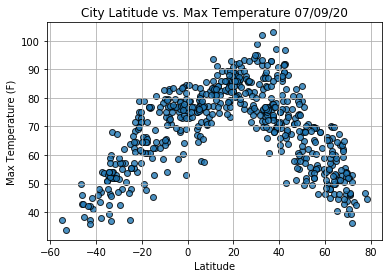

In [19]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

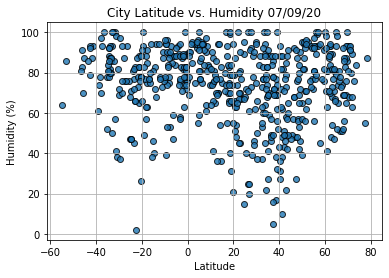

In [20]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

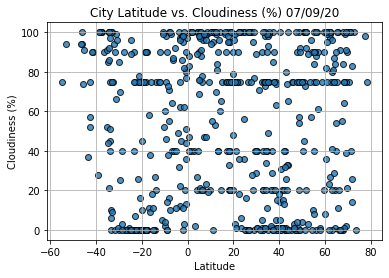

In [21]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

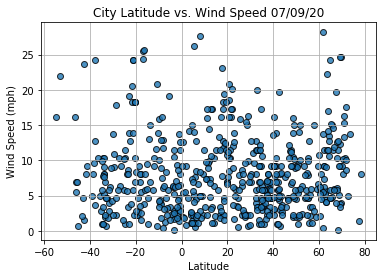

In [22]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")

plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [23]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.  
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [24]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,Qaanaaq,GL,2020-07-09 22:24:34,77.48,-69.36,46.63,55,98,1.41
4,Hilo,US,2020-07-09 22:29:16,19.73,-155.09,82.40,65,90,6.93
5,Silchar,IN,2020-07-09 22:29:16,24.82,92.80,76.15,95,100,0.51
6,Babu,CN,2020-07-09 22:29:16,24.42,111.52,77.95,89,100,3.53
7,Butaritari,KI,2020-07-09 22:29:17,3.07,172.79,84.00,75,2,14.14


In [25]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

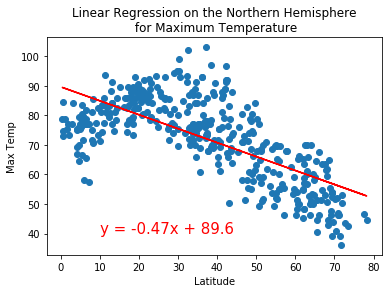

In [26]:
# Perform Linear Regression on the Maximum Temperature for the Northern Hemisphere
# Linear regression on the Nothern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plt.title("Linear Regression on the Northern Hemisphere\n for Maximum Temperature")
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere\n for Maximum Temperature', 'Max Temp', (10,40))

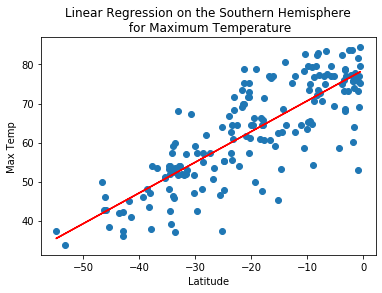

In [27]:
# Perform Linear Regression on the Maximum Temperature for the Southern Hemisphere
# Linear regression on the Nothern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plt.title("Linear Regression on the Southern Hemisphere\n for Maximum Temperature")
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere\n for Maximum Temperature', 'Max Temp', (-50,90))

In [28]:
#Findings- Find the Correlation Between Latitude and Maximum Temperature:
# The correlation between the latitude and the maximum temperature is strong to very strong because the r-value is less than –0.7 for the Northern Hemisphere and greater than 0.7 for the Southern Hemisphere, as shown by the plots here. This means that as we approach the equator, 0° latitude, the temperatures become warmer. And when we are further from the equator the temperatures become cooler. Check the r-values for your plots. 

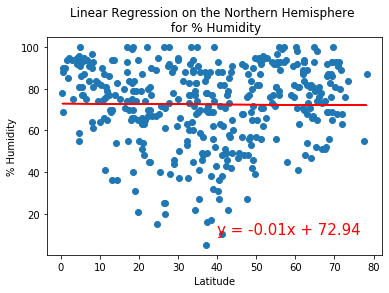

In [29]:
# Perform Linear Regression on the Percent Humidity for the Northern Hemisphere
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plt.title("Linear Regression on the Northern Hemisphere \n for % Humidity")
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

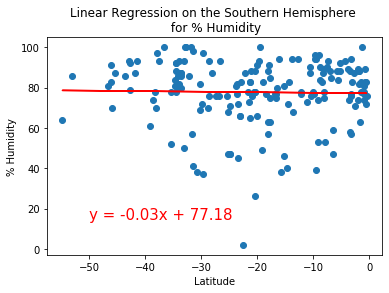

In [30]:
# Perform Linear Regression on the Percent Humidity for the Southern Hemisphere
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plt.title("Linear Regression on the Southern Hemisphere \n for % Humidity")
# Call the function.
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

In [31]:
# Findings - Find the Correlation Between Latitude and Percent Humidity:
# The correlation between the latitude and percent humidity is very low because the r-value is less than 0.04 for the Northern and Southern Hemispheres for the plots shown here. This means that percent humidity is unpredictable due to changing weather patterns that can increase or decrease percent humidity. Check the r-values for your plots. 

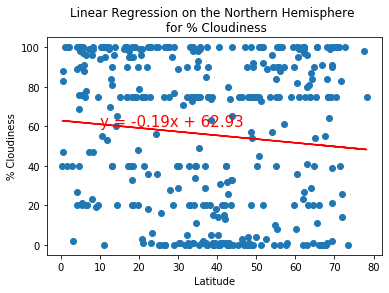

In [32]:
# Skill drill 6.4.4 - Perform Linear Regression on the Percent Cloudiness for the Northern Hemisphere
# Linear regression on the Nothern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plt.title("Linear Regression on the Northern Hemisphere \n for % Cloudiness")
# Call the function.
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Nothern Hemisphere\n for % Cloudiness', '% Cloudiness', (10,60))

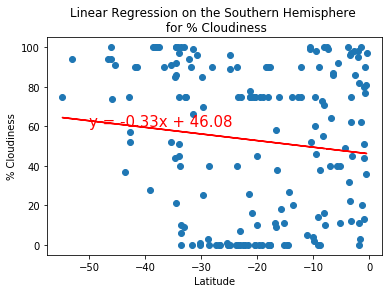

In [33]:
# Perform Linear Regression on the Percent Cloudiness for the Southern Hemisphere
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plt.title("Linear Regression on the Southern Hemisphere \n for % Cloudiness")
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

In [34]:
# Findings - Find the Correlation Between Latitude and Percent Cloudiness:
#The correlation between the latitude and percent cloudiness is very low because the r-value is less than –0.09 for the Northern Hemisphere and less than –0.02 for the Southern Hemisphere for the plots shown here. This means that cloudiness is unpredictable due to changing weather patterns that can increase or decrease percent cloudiness. Check the r-values for your plots. 

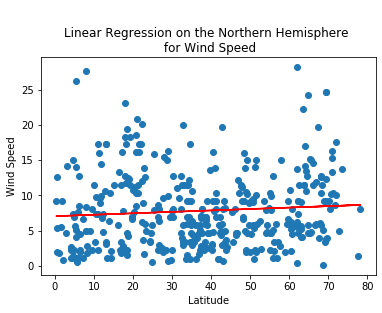

In [35]:
# Perform Linear Regression on the Wind Speed for the Northern Hemisphere
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plt.title("Linear Regression on the Northern Hemisphere \n for Wind Speed")
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

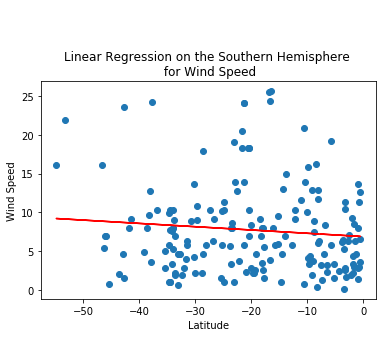

In [36]:
# Perform Linear Regression on the Wind Speed for the Southern Hemisphere
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plt.title("Linear Regression on the Southern Hemisphere \n for Wind Speed")
# Call the function.
plot_linear_regression(x_values, y_values,  'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,35))
#plt.ylim(0,40)

In [37]:
# Findings - Find the Correlation Between Latitude and Wind Speed
# The correlation between the latitude and wind speed is very low because the r-value is less  than –0.07 for the Northern Hemisphere and less than –0.3 for the Southern Hemisphere for the plots shown here . This means that wind speed is unpredictable due to changing weather patterns that can increase or decrease wind speed. Check the r-values for your plots. 